# Manipulation avec Pandas

### Table des Matières

* [Import-des-librairies](#Import-des-librairies)
* [Travail-à-faire](#Travail-à-faire)   
    * [Dataset par client](#Créer-le-dataset-par-client-)
        * [Création-du-nouveau-dataframe-par-client](#Création-du-nouveau-dataframe-par-client)
    * [Centrer/Réduire-les-données](#Centrer/Réduire-les-données)
        * [Displot](#Displot)
    * [Matrice-de-corrélation](#Matrice-de-corrélation)
* [Methode K mean](#K-Means-Elbow-method)
    * [Ajout de la colonne cluster](#Ajout-de-la-colonne-"Cluster")
    * [Indice de silhouette](#Indice-de-silhouette)
    * [Interprétation-des-Clusters](#Interprétation-des-Clusters)

## Import des librairies

In [1]:
import pandas as pd
import numpy as np
import datetime
import time
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
customers=pd.read_csv("C:/Users/mattb/OneDrive/Documents/Simplon/Dataset/dataset_librairies/customers.csv")
customers

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943
...,...,...,...
8618,c_7920,m,1956
8619,c_7403,f,1970
8620,c_5119,m,1974
8621,c_5643,f,1968


In [3]:
products=pd.read_csv("C:/Users/mattb/OneDrive/Documents/Simplon/Dataset/dataset_librairies/products.csv")
products

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0
...,...,...,...
3282,2_23,115.99,2
3283,0_146,17.14,0
3284,0_802,11.22,0
3285,1_140,38.56,1


In [4]:
transactions=pd.read_csv("C:/Users/mattb/OneDrive/Documents/Simplon/Dataset/dataset_librairies/transactions.csv")
transactions

,id_prod,date,session_id,client_id
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242
...,...,...,...,...
337011,1_671,2021-05-28 12:35:46.214839,s_40720,c_3454
337012,0_759,2021-06-19 00:19:23.917703,s_50568,c_6268
337013,0_1256,2021-03-16 17:31:59.442007,s_7219,c_4137
337014,2_227,2021-10-30 16:50:15.997750,s_112349,c_5


In [5]:
data_inter=customers.merge(transactions)
data_inter

,client_id,sex,birth,id_prod,date,session_id
0,c_4410,f,1967,0_1455,2021-03-22 14:29:25.189266,s_9942
1,c_4410,f,1967,0_1376,2021-09-24 22:58:27.418343,s_94984
2,c_4410,f,1967,1_312,2022-01-29 14:07:47.482092,s_156960
3,c_4410,f,1967,1_653,2021-07-29 23:34:41.866951,s_68860
4,c_4410,f,1967,0_1110,2021-11-04 16:28:30.169021,s_114715
...,...,...,...,...,...,...
337011,c_84,f,1982,1_459,2022-02-17 00:16:56.629536,s_166337
337012,c_84,f,1982,0_1050,2021-09-20 10:05:37.086910,s_92701
337013,c_84,f,1982,0_1417,2021-03-13 23:55:06.835238,s_5960
337014,c_84,f,1982,1_343,2021-04-13 03:59:33.614841,s_19845


In [6]:
data = data_inter.merge(products)
data['age'] = 2022 - data.birth
data

,client_id,sex,birth,id_prod,date,session_id,price,categ,age
0,c_4410,f,1967,0_1455,2021-03-22 14:29:25.189266,s_9942,8.99,0,55
1,c_4389,m,1984,0_1455,2021-07-09 11:16:18.579726,s_59967,8.99,0,38
2,c_5019,f,1977,0_1455,2022-01-15 00:01:53.456196,s_149928,8.99,0,45
3,c_7049,f,1987,0_1455,2021-03-04 14:01:38.698752,s_1637,8.99,0,35
4,c_5110,f,1982,0_1455,2021-09-05 11:48:41.065009,s_85364,8.99,0,40
...,...,...,...,...,...,...,...,...,...
336908,c_7135,m,1996,2_99,2021-07-11 20:56:49.820935,s_61009,84.99,2,26
336909,c_5828,f,1998,2_99,2021-11-21 01:53:46.967570,s_122697,84.99,2,24
336910,c_8260,m,1991,0_833,2021-09-27 23:22:40.394509,s_96558,2.99,0,31
336911,c_8138,f,1984,0_394,2021-11-09 09:02:38.299240,s_116986,2.14,0,38


In [7]:
data = data.drop(data[data.price < 0].index)
data.shape

(336713, 9)

## Travail à faire

### Créer le dataset par client <a class="anchor" id="Dataset par client"></a>

| id_client | Age | Sexe | *Montant | *Fréquence | *Panier Moyen | *Tranche d'Age | *Montant catégorie 0 | *Montant catég 1 | *Montant catég 2 | *Récence |
|:---------:|-----|------|----------|------------|---------------|----------------|----------------------|------------------|------------------|---------|
|           |     |      |          |            |               |                |                      |                  |                  |         |
|           |     |      |          |            |               |                |                      |                  |                  |         |

Les colonnes précédées d'un "*" sont les nouvelles colonnes à calculer.  
Montant : montant dépensé total des achats sur la période  


Fréquence : nombre d'achat sur la période

Récence : nombre de jour depuis le dernier achat (Attention, partir du max(Date) du dataset !)
  
Vous devez avoir à la fin, une ligne par client.  

**Fonctions nécessaires :**  
 - [groupby()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)
 - [pivot_table()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) (+ reset_index() )
 

Ceci peut vous aider :

In [8]:
#from datetime import datetime
#data['date'] = data['date'].apply(pd.to_datetime)

# Data_client_id

In [9]:
clientid = data.groupby(['client_id', 'sex', 'age']).sum().reset_index()
clientid = clientid.drop(['birth','price','categ'], axis = 1)
clientid

,client_id,sex,age
0,c_1,m,67
1,c_10,m,66
2,c_100,m,30
3,c_1000,f,56
4,c_1001,m,40
...,...,...,...
8595,c_995,m,67
8596,c_996,f,52
8597,c_997,f,28
8598,c_998,m,21


# Montant

In [10]:
montant = data.groupby('client_id')[['price']].sum()
montant.columns = ['Montant']
montant = montant.reset_index()
montant

,client_id,Montant
0,c_1,300.65
1,c_10,586.18
2,c_100,222.87
3,c_1000,980.02
4,c_1001,1102.45
...,...,...
8595,c_995,119.08
8596,c_996,739.60
8597,c_997,572.89
8598,c_998,1527.69


# Panier moyen et Fréquence

In [11]:
#Panier_moyen = data.groupby('client_id')[['price']].mean()
#Panier_moyen.columns = ['Panier_moyen']
#Panier_moyen = Panier_moyen.reset_index()
#Panier_moyen
panier_moyen_et_frequence =  data.groupby(["client_id","session_id"]).agg(montant = ('price', 'sum')).reset_index()\
                    .groupby("client_id").agg(panier_moyen= ('montant',"mean"),
                                frequence = ('session_id','count'))             
panier_moyen_et_frequence

,panier_moyen,frequence
client_id,,
c_1,20.043333,15
c_10,36.636250,16
c_100,74.290000,3
c_1000,23.333810,42
c_1001,45.935417,24
...,...,...
c_995,23.816000,5
c_996,20.544444,36
c_997,57.289000,10


# Tranche d'Age

In [12]:
age = data.groupby('client_id')['age'].mean()
agegroupe = pd.cut(x=age, bins=[1,10,20,30,40,50,60,70,80,90,100])
agegroupe = pd.DataFrame(agegroupe)
agegroupe.columns = ['Tranche-d_age']
agegroupe.reset_index()


,client_id,Tranche-d_age
0,c_1,"(60, 70]"
1,c_10,"(60, 70]"
2,c_100,"(20, 30]"
3,c_1000,"(50, 60]"
4,c_1001,"(30, 40]"
...,...,...
8595,c_995,"(60, 70]"
8596,c_996,"(50, 60]"
8597,c_997,"(20, 30]"
8598,c_998,"(20, 30]"


# Montant catégorie 

In [13]:
categ = pd.pivot_table(data, index=['client_id'], values = ['price'],columns=['categ'],  aggfunc=sum, fill_value=0)
categ.columns = ['montant_categ_O','montant_categ_1','montant_categ_2']
categ = categ.reset_index()
categ

,client_id,montant_categ_O,montant_categ_1,montant_categ_2
0,c_1,174.20,71.58,54.87
1,c_10,124.92,391.27,69.99
2,c_100,31.38,52.96,138.53
3,c_1000,169.85,810.17,0.00
4,c_1001,527.81,274.64,300.00
...,...,...,...,...
8595,c_995,55.34,63.74,0.00
8596,c_996,204.70,534.90,0.00
8597,c_997,84.86,158.92,329.11
8598,c_998,88.17,108.06,1331.46


# Recence

In [14]:
from datetime import datetime 
data['date'] = data['date'].apply(pd.to_datetime)

In [15]:
date_format = "%m/%d/%Y"
a = data['date']
b = max(data['date'])
data['recence'] = b-a
data['recence'] = data['recence'].astype('timedelta64[D]')
recence = data.groupby('client_id')['recence'].min()
recence = pd.DataFrame(recence).reset_index()
recence

,client_id,recence
0,c_1,27.0
1,c_10,76.0
2,c_100,202.0
3,c_1000,0.0
4,c_1001,2.0
...,...,...
8595,c_995,116.0
8596,c_996,22.0
8597,c_997,54.0
8598,c_998,5.0


# Création du nouveau dataframe par client

In [16]:
Data_client_id = clientid.merge(montant, left_on='client_id',right_on = 'client_id',how ='left')
Data_client_id = Data_client_id.merge(panier_moyen_et_frequence, left_on='client_id',right_on = 'client_id',how ='left')
Data_client_id = Data_client_id.merge(agegroupe, left_on='client_id',right_on = 'client_id',how ='left')
Data_client_id = Data_client_id.merge(categ, left_on='client_id',right_on = 'client_id',how ='left')
Data_client_id = Data_client_id.merge(recence, left_on='client_id',right_on = 'client_id',how ='left')

Data_client_id

,client_id,sex,age,Montant,panier_moyen,frequence,Tranche-d_age,montant_categ_O,montant_categ_1,montant_categ_2,recence
0,c_1,m,67,300.65,20.043333,15,"(60, 70]",174.20,71.58,54.87,27.0
1,c_10,m,66,586.18,36.636250,16,"(60, 70]",124.92,391.27,69.99,76.0
2,c_100,m,30,222.87,74.290000,3,"(20, 30]",31.38,52.96,138.53,202.0
3,c_1000,f,56,980.02,23.333810,42,"(50, 60]",169.85,810.17,0.00,0.0
4,c_1001,m,40,1102.45,45.935417,24,"(30, 40]",527.81,274.64,300.00,2.0
...,...,...,...,...,...,...,...,...,...,...,...
8595,c_995,m,67,119.08,23.816000,5,"(60, 70]",55.34,63.74,0.00,116.0
8596,c_996,f,52,739.60,20.544444,36,"(50, 60]",204.70,534.90,0.00,22.0
8597,c_997,f,28,572.89,57.289000,10,"(20, 30]",84.86,158.92,329.11,54.0
8598,c_998,m,21,1527.69,117.514615,13,"(20, 30]",88.17,108.06,1331.46,5.0


In [17]:
Data_client_id.to_csv('data_librairies_client.csv')

### Centrer/Réduire les données

Petite veille sur le sujet avant de se lancer : https://mrmint.fr/data-preprocessing-feature-scaling-python   
Mais n'oubliez pas de faire aussi vos propres recherches.

Créer le dataset avec les données centrées et réduites.

In [18]:
#Z-Score standardisation
from sklearn.preprocessing import StandardScaler
df_std = Data_client_id.copy()

#ICI LE NOM DE TES COLONNES
num_columns = ['age', 'recence', 'montant_categ_O', 'montant_categ_1',\
                                           'montant_categ_2', 'Montant', 'panier_moyen', 'frequence']
#fit, on lui donne les données pour l'entraînement
std_scaler = StandardScaler().fit(Data_client_id[num_columns])

#transform, il va appliquer le modèle sur les données
df_std[num_columns] = std_scaler.transform(Data_client_id[num_columns])
df_std.drop(['client_id','sex','Tranche-d_age'],axis=1)
df_std

,client_id,sex,age,Montant,panier_moyen,frequence,Tranche-d_age,montant_categ_O,montant_categ_1,montant_categ_2,recence
0,c_1,m,1.375740,-0.145524,-0.886085,-0.065034,"(60, 70]",-0.067417,-0.224196,-0.071303,-0.102653
1,c_10,m,1.316596,-0.034237,-0.153254,-0.051112,"(60, 70]",-0.106470,0.153541,-0.060364,0.983415
2,c_100,m,-0.812603,-0.175839,1.509736,-0.232100,"(20, 30]",-0.180599,-0.246197,-0.010777,3.776163
3,c_1000,f,0.725152,0.119265,-0.740760,0.310864,"(50, 60]",-0.070864,0.648503,-0.110999,-0.701099
4,c_1001,m,-0.221159,0.166983,0.257447,0.060265,"(30, 40]",0.212814,0.015734,0.106041,-0.656770
...,...,...,...,...,...,...,...,...,...,...,...
8595,c_995,m,1.375740,-0.216292,-0.719464,-0.204256,"(60, 70]",-0.161611,-0.233460,-0.110999,1.870002
8596,c_996,f,0.488574,0.025560,-0.863953,0.227331,"(50, 60]",-0.043246,0.323251,-0.110999,-0.213477
8597,c_997,f,-0.930892,-0.039416,0.758881,-0.134645,"(20, 30]",-0.138217,-0.120998,0.127101,0.495793
8598,c_998,m,-1.344902,0.332724,3.418764,-0.092879,"(20, 30]",-0.135594,-0.181093,0.852269,-0.590276


# Displot

C:\Users\mattb\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

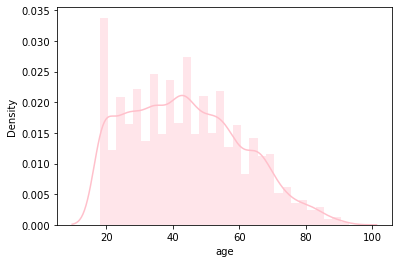

In [19]:
sns.distplot(Data_client_id['age'], kde=True, color='pink')

C:\Users\mattb\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

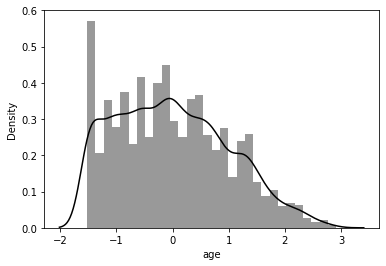

In [20]:
sns.distplot(df_std['age'], kde=True, color='black')

C:\Users\mattb\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

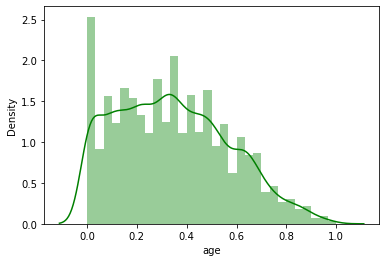

In [21]:
from sklearn.preprocessing import MinMaxScaler
df_std_2 = Data_client_id.copy()

std_scaler = MinMaxScaler().fit(Data_client_id[num_columns])
df_std_2[num_columns] = std_scaler.transform(Data_client_id[num_columns])
df_std_2.drop(['sex','Tranche-d_age'],axis=1)
sns.distplot(df_std_2['age'], kde=True, color='green')

In [22]:
#array et reshape valeur âge
age_scaler=np.array(Data_client_id['age'])
age_scaler=age_scaler.reshape(8600, 1)
scaler = StandardScaler()
scaler_standard = scaler.fit_transform(age_scaler)
scaler_standard

array([[ 1.37574001],
       [ 1.31659561],
       [-0.8126028 ],
       ...,
       [-0.9308916 ],
       [-1.3449024 ],
       [ 0.84344041]])

### Matrice de corrélation

Comment sont calculés les coefficients ? Par quelle méthode ? Qu'est-ce que signifie une corrélation positive/négative ? 

Pour vous aiguillez avec Python : https://www.delftstack.com/fr/howto/python-pandas/pandas-correlation-matrix/

<AxesSubplot:>

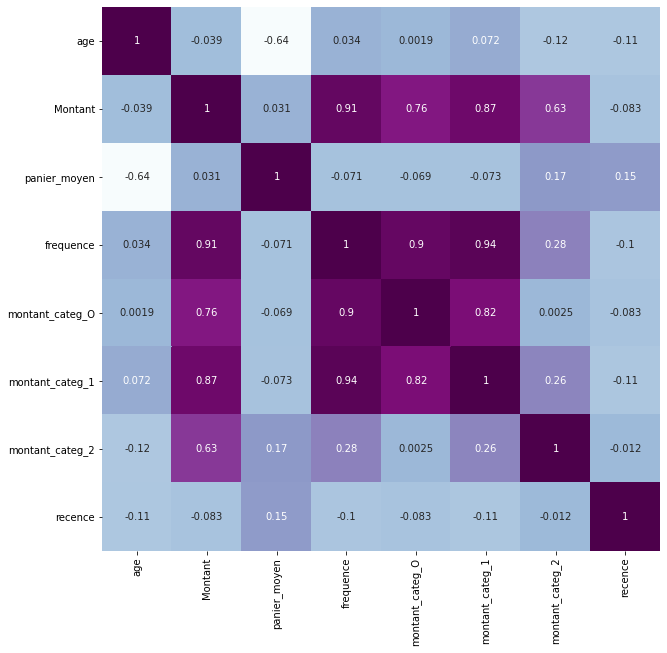

In [23]:
import seaborn as sns 
import matplotlib.pyplot as plt 

plt.figure(figsize = (10,10))
sns.heatmap(df_std.corr(),annot= True, cbar = False, cmap="BuPu")

# K-Means Elbow method

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.cluster import KMeans
from sklearn import datasets


In [25]:
!pip install yellowbrick

In [26]:
!pip install --user yellowbrick

In [27]:
df_std=df_std.drop(['client_id','sex','Tranche-d_age',],axis=1)
df_std

,age,Montant,panier_moyen,frequence,montant_categ_O,montant_categ_1,montant_categ_2,recence
0,1.375740,-0.145524,-0.886085,-0.065034,-0.067417,-0.224196,-0.071303,-0.102653
1,1.316596,-0.034237,-0.153254,-0.051112,-0.106470,0.153541,-0.060364,0.983415
2,-0.812603,-0.175839,1.509736,-0.232100,-0.180599,-0.246197,-0.010777,3.776163
3,0.725152,0.119265,-0.740760,0.310864,-0.070864,0.648503,-0.110999,-0.701099
4,-0.221159,0.166983,0.257447,0.060265,0.212814,0.015734,0.106041,-0.656770
...,...,...,...,...,...,...,...,...
8595,1.375740,-0.216292,-0.719464,-0.204256,-0.161611,-0.233460,-0.110999,1.870002
8596,0.488574,0.025560,-0.863953,0.227331,-0.043246,0.323251,-0.110999,-0.213477
8597,-0.930892,-0.039416,0.758881,-0.134645,-0.138217,-0.120998,0.127101,0.495793
8598,-1.344902,0.332724,3.418764,-0.092879,-0.135594,-0.181093,0.852269,-0.590276


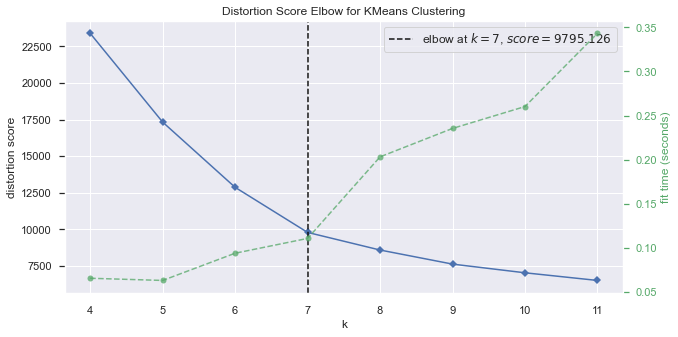

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [76]:
import matplotlib as mpl 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k =(4,12))
visualizer.fit(df_std)
visualizer.show()

la cassure determine le nombre de cluster necessaire 

# Ajout de la colonne "Cluster"

In [93]:
kmn= KMeans(n_clusters=7, random_state = 24)

In [94]:
Data_client_id["cluster"] = kmn.fit_predict(df_std)

In [95]:
Data_client_id.head(10)

,client_id,sex,age,Montant,panier_moyen,frequence,Tranche-d_age,montant_categ_O,montant_categ_1,montant_categ_2,recence,cluster
0,c_1,m,67,300.65,20.043333,15,"(60, 70]",174.20,71.58,54.87,27.0,6
1,c_10,m,66,586.18,36.636250,16,"(60, 70]",124.92,391.27,69.99,76.0,6
2,c_100,m,30,222.87,74.290000,3,"(20, 30]",31.38,52.96,138.53,202.0,5
3,c_1000,f,56,980.02,23.333810,42,"(50, 60]",169.85,810.17,0.00,0.0,6
4,c_1001,m,40,1102.45,45.935417,24,"(30, 40]",527.81,274.64,300.00,2.0,1
5,c_1002,f,40,298.65,27.150000,11,"(30, 40]",203.77,94.88,0.00,18.0,1
6,c_1003,m,40,552.67,26.317619,21,"(30, 40]",389.91,162.76,0.00,20.0,1
7,c_1004,m,49,520.23,28.901667,18,"(40, 50]",302.92,217.31,0.00,10.0,1
8,c_1005,f,81,476.67,31.778000,15,"(80, 90]",151.00,325.67,0.00,25.0,6
9,c_1006,m,43,1925.49,30.563333,63,"(40, 50]",1227.17,698.32,0.00,6.0,1


# Indice de silhouette

In [96]:
from sklearn.metrics import silhouette_score

In [98]:
silhouette_score(df_std, Data_client_id['cluster'])

0.3516515498066816

SilhouetteVisualizer(ax=<AxesSubplot:>,
                     estimator=KMeans(n_clusters=7, random_state=24))

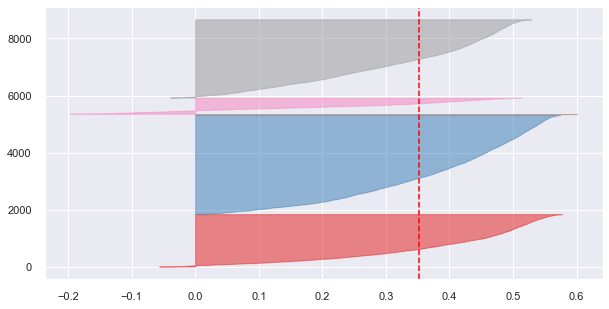

In [99]:
viz = SilhouetteVisualizer(kmn)
viz.fit(df_std)

# Interprétation des Clusters 

In [102]:
Data_client_id['cluster'].value_counts()

1    3464
6    2741
0    1833
5     558
4       2
2       1
3       1
Name: cluster, dtype: int64

<AxesSubplot:xlabel='cluster', ylabel='age'>

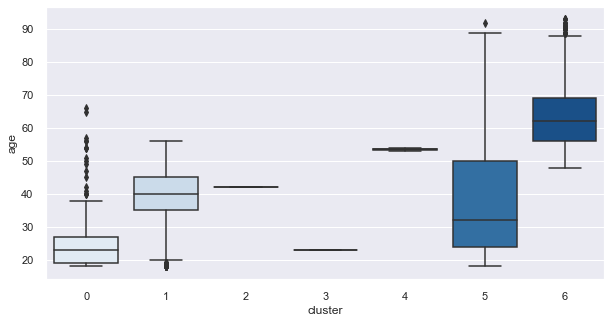

In [78]:
sns.set(rc = {'figure.figsize':(10,5)})
sns.boxplot(x ='cluster',y = 'age', data=Data_client_id, palette="Blues")

<AxesSubplot:xlabel='cluster', ylabel='Montant'>

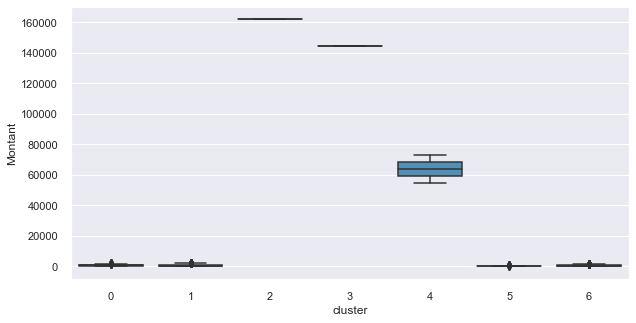

In [79]:
sns.set(rc = {'figure.figsize':(10,5)})
sns.boxplot(x ='cluster',y = 'Montant', data=Data_client_id, palette="Blues")

<AxesSubplot:xlabel='cluster', ylabel='panier_moyen'>

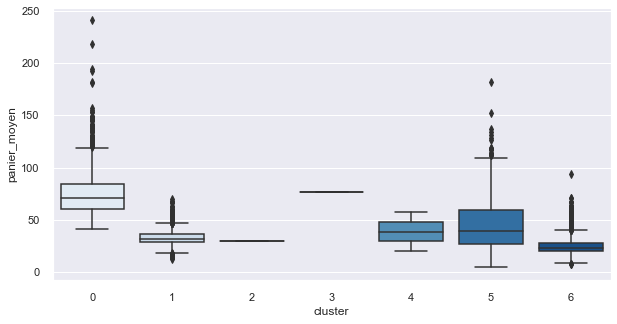

In [80]:
sns.set(rc = {'figure.figsize':(10,5)})
sns.boxplot(x ='cluster',y = 'panier_moyen', data=Data_client_id, palette="Blues")

<AxesSubplot:xlabel='cluster', ylabel='frequence'>

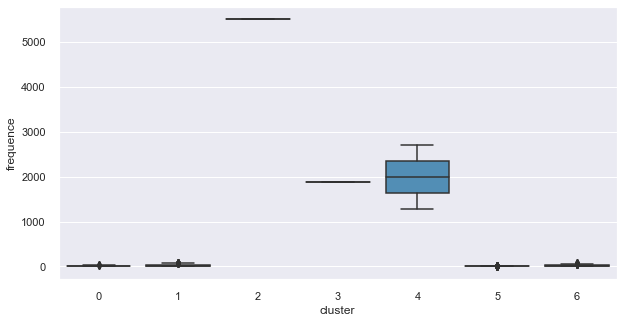

In [81]:
sns.set(rc = {'figure.figsize':(10,5)})
sns.boxplot(x ='cluster',y = 'frequence', data=Data_client_id, palette="Blues")

<AxesSubplot:xlabel='cluster', ylabel='montant_categ_O'>

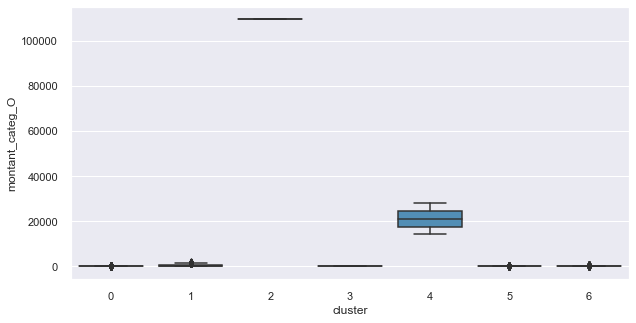

In [82]:
sns.set(rc = {'figure.figsize':(10,5)})
sns.boxplot(x ='cluster',y = 'montant_categ_O', data=Data_client_id, palette="Blues")

<AxesSubplot:xlabel='cluster', ylabel='montant_categ_1'>

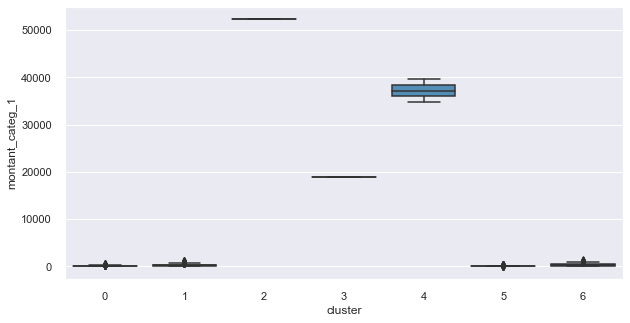

In [83]:
sns.set(rc = {'figure.figsize':(10,5)})
sns.boxplot(x ='cluster',y = 'montant_categ_1', data=Data_client_id, palette="Blues")

<AxesSubplot:xlabel='cluster', ylabel='montant_categ_2'>

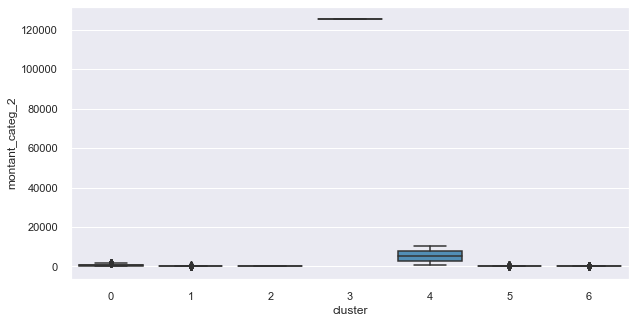

In [100]:
sns.set(rc = {'figure.figsize':(10,5)})
sns.boxplot(x ='cluster',y = 'montant_categ_2', data=Data_client_id, palette="Blues")

<AxesSubplot:xlabel='cluster', ylabel='recence'>

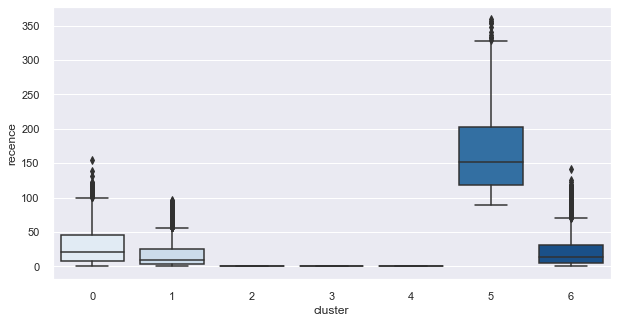

In [101]:
sns.set(rc = {'figure.figsize':(10,5)})
sns.boxplot(x ='cluster',y = 'recence', data=Data_client_id, palette="Blues")